# Intern Name - Rishab Goswami

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans

In [57]:
df = pd.read_csv("Iris.csv")

In [58]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [59]:
df = df.drop(["Id",], axis=1)

In [60]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [61]:
inertia=[]
distortion=[]

In [62]:
X = df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm","PetalWidthCm"]]

In [63]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [64]:
for i in range(2,11):
    model = KMeans(n_clusters=i,random_state = 0)
    model.fit(X)
    distortion.append(sum(np.min(cdist(X, model.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertia.append(model.inertia_)

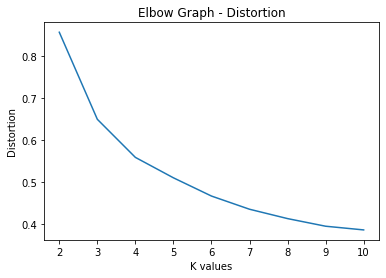

In [65]:
plt.plot(range(2,11),distortion)
plt.xlabel('K values')
plt.ylabel('Distortion')
plt.title('Elbow Graph - Distortion')
plt.show()

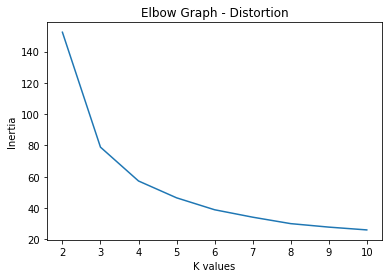

In [66]:
plt.plot(range(2,11),inertia)
plt.xlabel('K values')
plt.ylabel('Inertia')
plt.title('Elbow Graph - Distortion')
plt.show()

## In both graphs the elbow is at i = 3

In [67]:
final_model = KMeans(n_clusters=3,random_state = 0)
prediction=final_model.fit_predict(X)
prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [68]:
X = X.values

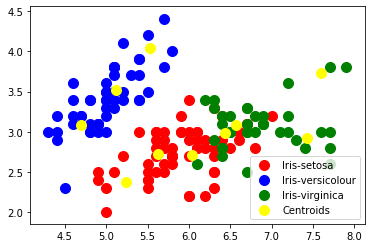

In [69]:
plt.scatter(X[prediction == 0, 0], X[prediction == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[prediction == 1, 0], X[prediction == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[prediction == 2, 0], X[prediction == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()